<a href="https://colab.research.google.com/github/davidperezaponte/OIBSIP/blob/main/Project2/t2_unploymentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import modules
!pip install opendatasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import opendatasets as od

This dataset contains the unemployment rate of all the states in India

Region = states in India
Date = date which the unemployment rate observed
Frequency = measuring frequency (Monthly)

Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India

Estimated Employed = percentage of people employed

Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of people actively participating in the labour force by the total number of people eligible to participate in the labor force force

source of datasets
https://unemploymentinindia.cmie.com/

In [ ]:
# Download of dataset

dataset_link = "https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davidperez043
Your Kaggle Key: ··········


100%|██████████| 16.0k/16.0k [00:00<00:00, 4.33MB/s]

In [ ]:
# Identify the files in the directory
import os
os.chdir("unemployment-in-india")
os.listdir()

['Unemployment in India.csv', 'Unemployment_Rate_upto_11_2020.csv']

In [ ]:
# Load of dataset
df = pd.read_csv("Unemployment in India.csv")
# We eliminate any space in the name of the columns
df.columns = df.columns.str.strip()
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
# Check the number of registers
df.shape

(768, 7)

In [ ]:
# Types of the atributes
df.dtypes

Region                                      object
Date                                        object
Frequency                                   object
Estimated Unemployment Rate (%)            float64
Estimated Employed                         float64
Estimated Labour Participation Rate (%)    float64
Area                                        object
dtype: object

In [ ]:
df.describe(include='O')

,Region,Date,Frequency,Area
count,740,740,740,740
unique,28,14,2,2
top,Andhra Pradesh,31-10-2019,Monthly,Urban
freq,28,55,381,381


In [ ]:
# Centrality and deviation measure for numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


In [ ]:
# Verifcation of null values
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [ ]:
# As there are few null values, We eliminate them
df.dropna(inplace=True)

In [ ]:
# Verifcation of null values
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

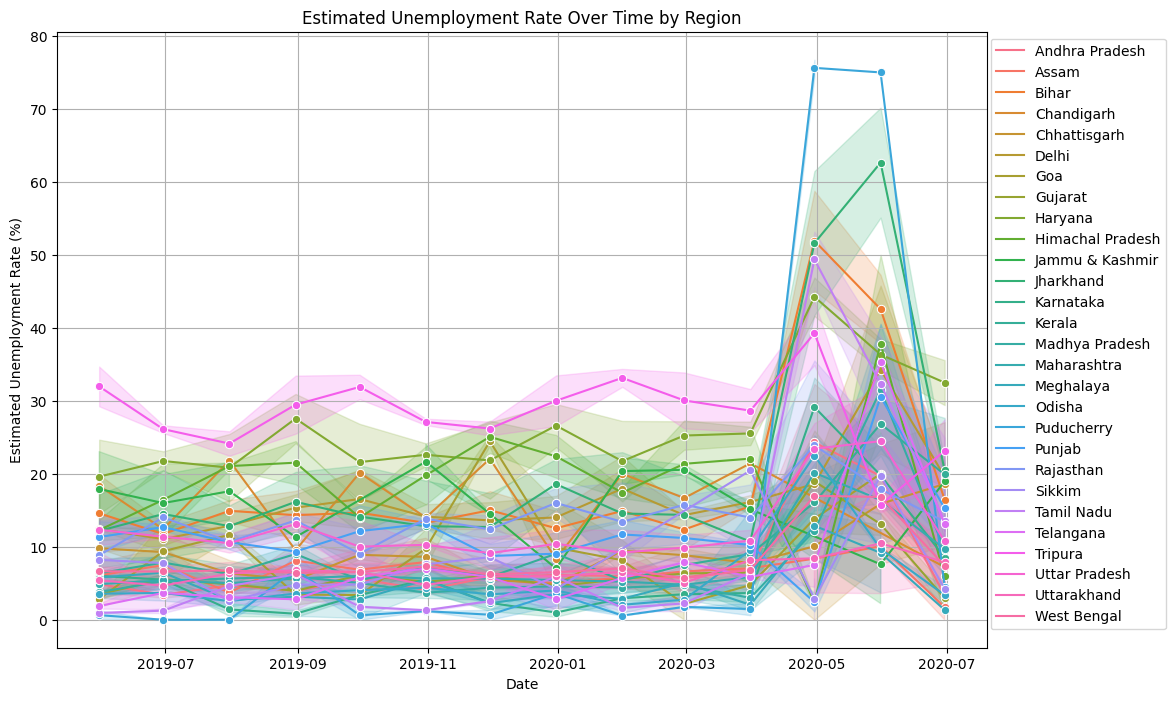

In [ ]:
# We create a timeline of the Estimated Unemployment Rate (%)

# We convert the Date column in format datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sort the DataFrame by Date
df.sort_values(by=['Region', 'Date'], inplace=True)

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Date', y='Estimated Unemployment Rate (%)', hue='Region', marker='o')

# Adjust legend position
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))

plt.title('Estimated Unemployment Rate Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.grid(True)
plt.show()

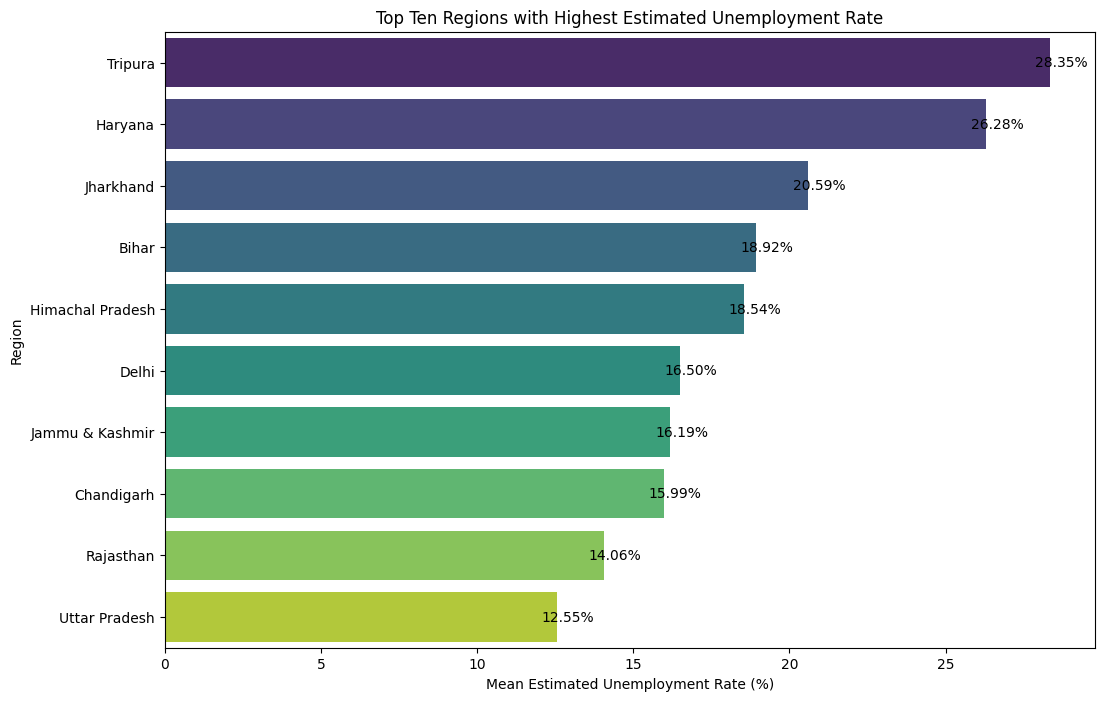

In [ ]:
# Calculate the mean of the 'Estimated Unemployment Rate (%)' by Region
mean_rates = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

# Sort the DataFrame by mean rates in descending order
mean_rates.sort_values(by='Estimated Unemployment Rate (%)', ascending=False, inplace=True)

# Plotting the top ten regions with the highest rates
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=mean_rates.head(10), palette='viridis')

# Annotate bars with mean values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black', xytext=(8, 0),
                textcoords='offset points')

plt.title('Top Ten Regions with Highest Estimated Unemployment Rate')
plt.xlabel('Mean Estimated Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()


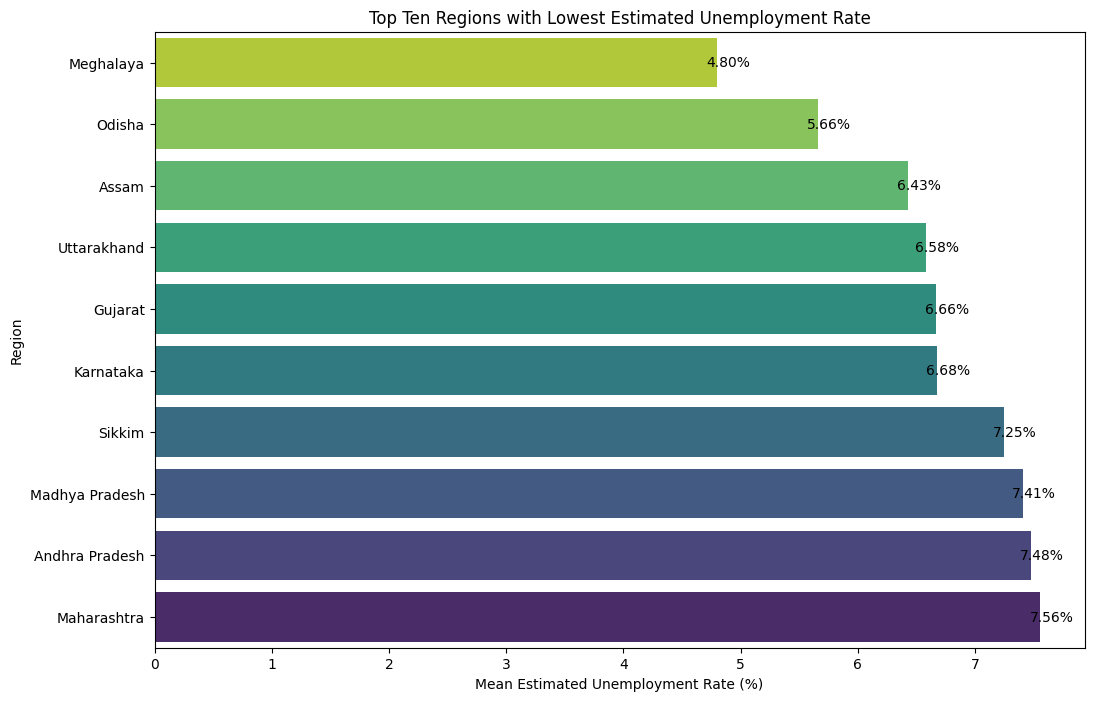

In [ ]:
# Plotting the top ten regions with the lowest rates
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=mean_rates.tail(10).sort_values(by='Estimated Unemployment Rate (%)'), palette='viridis_r')

# Annotate bars with mean values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center', fontsize=10, color='black', xytext=(8, 0),
                textcoords='offset points')

plt.title('Top Ten Regions with Lowest Estimated Unemployment Rate')
plt.xlabel('Mean Estimated Unemployment Rate (%)')
plt.ylabel('Region')
plt.show()

In [ ]:
# Find the row with the highest 'Estimated Unemployment Rate (%)'
max_rate_row = df.loc[df['Estimated Unemployment Rate (%)'].idxmax()]

# Get the region and date with the highest peak
highest_peak_region = max_rate_row['Region']
highest_peak_date = max_rate_row['Date']
highest_peak_rate = max_rate_row['Estimated Unemployment Rate (%)']

print(f"Region with the highest peak: {highest_peak_region}")
print(f"Date with the highest peak: {highest_peak_date}")
print(f"Highest peak rate: {highest_peak_rate}%")

Region with the highest peak: Puducherry
Date with the highest peak: 2020-04-30 00:00:00
Highest peak rate: 76.74%


In [ ]:
# Find the row with the highest 'Estimated Unemployment Rate (%)'
min_rate_row = df.loc[df['Estimated Unemployment Rate (%)'].idxmin()]

# Get the region and date with the highest peak
minimum_peak_region = min_rate_row['Region']
minimum_peak_date = min_rate_row['Date']
minimumt_peak_rate = min_rate_row['Estimated Unemployment Rate (%)']

print(f"Region with the minimum peak: {minimum_peak_region}")
print(f"Date with the minimum peak: {minimum_peak_date}")
print(f"minimum peak rate: {minimumt_peak_rate}%")

Region with the minimum peak: Assam
Date with the minimum peak: 2020-06-30 00:00:00
minimum peak rate: 0.0%
